## <font color=darkcyan>Modèles de mélange</font>

#### <font color=darkorange>Densité de mélange </font>

Considérons un mélange de $K$ lois gaussiennes dont la densité est donnée par
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{\mathcal N(\mu_k,\sigma^2_k)}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$, $\mu_k\in\mathbb R$ et $\sigma_k>0$, $k=1,\dots,K$. 


In [1]:
"""""""""""""""""
Required packages
"""""""""""""""""
import seaborn as sns
import math
import autograd.numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
# package which differentiates standard Python and Numpy code
from autograd import grad
# to get progress bars
from tqdm import tqdm

#### Question 1
Ecrire une fonction **multi_gauss** qui prend en argument une moyenne et une matrice de covariance et renvoie l'opposé de  la logdensité gaussienne associée à ces paramètres. On écrira une fonction pour une variable en dimension $d>1$.

In [2]:
def multi_gauss(mu, sigma):
    """
    Inputs
    ----------
    mu: mean of the Gaussian distribution
    sigma: covariance matrix of the Gaussian distribution
    
    Outputs
    -------
    logp: opposite of the loglikelihood
    """

    def logp(x):
        k = mu.shape[0]
        cst = k * np.log(2 * np.pi)
        det = np.log(np.linalg.det(sigma))
        quad_term = np.dot(np.dot((x - mu).T, np.linalg.inv(sigma)), x - mu)
        return (cst +  det + quad_term) * 0.5
    
    return logp

#### Question 2
Ecrire une fonction **mixture** qui prend en argument différentes logdensités et un vecteur de poids et renvoie la logdensité du mélange associé.

In [3]:
def mixture(log_prob, weights):
    """
    Inputs
    ----------
    log_prob: opposite of the likelihood of each term
    weights: weights of the components of the mixture
    
    Outputs
    -------
    logp: opposite of the loglikelihood of the mixture
    """
    
    def logp(x):
        likelihood = 0
        for j in range(np.size(weights)):
            log_marginal = -log_prob[j](x)
            likelihood = likelihood + weights[j]*np.exp(log_marginal)
        
        return -np.log(likelihood)

    return logp

#### Question 3
Utilisez la fonction précédente pour tracer la densité d'un mélange de trois gaussiennes en dimension 2.
Les mélanges de lois gaussiennes peuvent être implémentés directement en Python en utilisant le package `sklearn.mixture`, voir ici https://scikit-learn.org/stable/modules/mixture.html pour une aide détaillée (non nécessaire pour cette question).


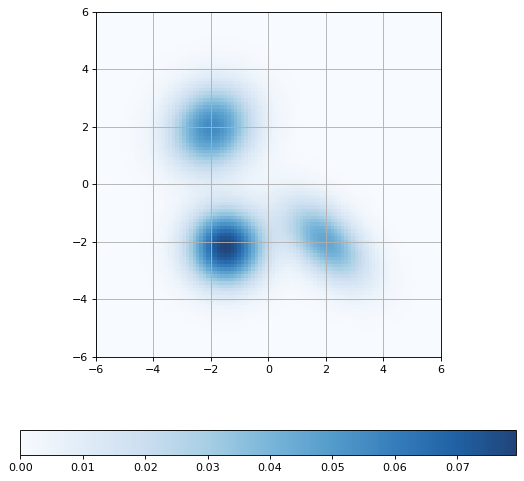

In [4]:
mu1 = 2*np.ones(2)
cov1 = np.array([[1., 0.5],
                [0.5, 1.]])
mu2 = -mu1
cov2 = np.array([[1., -0.1],
                [-0.1, 1.]])

mu3 = np.array([-1.5, 2.2])
cov3 = 0.8 * np.eye(2)

logp  = mixture([multi_gauss(mu1, cov1), multi_gauss(mu2, cov2), multi_gauss(mu3, cov3)], [0.25, 0.35, 0.4])

plt.figure(figsize=(8, 8), dpi=80)

grid_lim = 6
# grid on which the target pdf is displayed
grid_plot = (-grid_lim, grid_lim, -grid_lim, grid_lim)
# coordinates chosen on this grid
nb_points = 100

xplot = np.linspace(-grid_lim, grid_lim, nb_points)
yplot = np.linspace(-grid_lim, grid_lim, nb_points)
Xplot, Yplot = np.meshgrid(xplot, yplot)

Zplot = np.copy(Xplot)
for i in range(nb_points):
    for j in range(nb_points):
        Zplot[i][j] = np.exp(-logp(np.array((Xplot[i][j], Yplot[i][j]))))

plt.imshow(Zplot, alpha = 0.9, extent = grid_plot, cmap = 'Blues', origin = 'upper');
plt.grid(True)
plt.colorbar(orientation='horizontal');  

#### Question 4
- Considérons les mélanges de loi uniforme $U[0,\lambda]$ dont la densité est donnée par 
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{U[0,\lambda_k]}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$ et $\lambda_k>0$, $k=1,\dots,K$. Ecrire une fonction **uniform_logpdf** pour évaluer la densité du mélange. Quelles formes de densité peut-on obtenir avec un mélange uniforme ?
- Mêmes questions pour les mélanges de loi Gamma $\Gamma(\alpha,\beta)$ dont la densité est donnée par 
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{\Gamma(\alpha_k,\beta_k)}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$ et $\alpha_k>0, \beta_k>0$ pour $k=1,\dots,K$.  Comparer aux formes des mélanges gaussiens.

In [5]:
def uniform_logpdf(lmbd):
    """
    Inputs
    ----------
    lmbd: upper bound of the support of the uniform distribution
    
    Outputs
    -------
    logp: opposite of the loglikelihood
    """

    def logp(x):
        loglik = np.log(lmbd)*np.ones(x.shape[0])
        for j in range(x.shape[0]):
            if x[j]<0 or x[j]>lmbd:
                loglik[j] = math.inf
        return loglik
    
    return logp

In [6]:
def gamma_logpdf(a,b):
    """
    Inputs
    ----------
    a, b: shapes and inverse scales of the gamma distribution
    
    Outputs
    -------
    logp: opposite of the loglikelihood
    """

    def logp(x):
        loglik = -a*np.log(b) 
        loglik = loglik + np.log(math.gamma(a)) - (a-1)*np.log(x) + b*x
        return loglik
    
    return logp

C:\Users\Sylvain\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


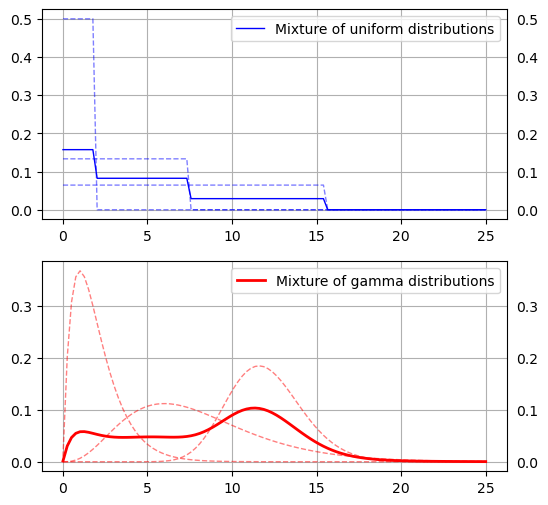

In [7]:
pi_k =  np.array([0.15, 0.40,0.45])
a = [2.0,4.0,30.0]
b = [1.0,0.5,2.5]
lambdas = np.array([2,7.5,15.5])    
logp_uniform  = mixture([uniform_logpdf(lambdas[0]),uniform_logpdf(lambdas[1]),uniform_logpdf(lambdas[2])],pi_k)
logp_gamma = mixture([gamma_logpdf(a[0],b[0]),gamma_logpdf(a[1],b[1]),gamma_logpdf(a[2],b[2])],pi_k)

xplot = np.linspace(0.01, 25.0, nb_points)

fig, axs = plt.subplots(2, figsize=(6, 6))

axs[0].plot(xplot,np.exp(-logp_uniform(xplot)),'b', lw=1, label = 'Mixture of uniform distributions');
axs[0].tick_params(labelright=True)
axs[0].grid(True)
axs[0].legend()

axs[1].plot(xplot,np.exp(-logp_gamma(xplot)),'r', lw=2, label = 'Mixture of gamma distributions');
axs[1].tick_params(labelright=True)
axs[1].grid(True)
axs[1].legend();

for j in range(pi_k.shape[0]):
    axs[0].plot(xplot,np.exp(-uniform_logpdf(lambdas[j])(xplot)),'b--', alpha = 0.5, lw=1, label = 'Component %d - uniform'%(j+1));
    axs[1].plot(xplot,np.exp(-gamma_logpdf(a[j],b[j])(xplot)),'r--', alpha= 0.5, lw=1, label = 'Component %d - gamma'%(j+1));

#### <font color=darkorange>Simulation de données</font>

#### Question 5
- Ecrire une fonction **rnormmix** pour générer des réalisations d'un mélange gaussien à $K$ composantes. Les arguments de la fonction sont la taille d'échantillon **n**, le moyennes, variances et poids des éléments du mélange.
- Tester votre fonction en générant un grand échantillon d'un mélange gaussien dont on compare l'histogramme à sa densité par un graphique.

In [8]:
def rnormmix(n, mu, sigma, weights):
    """
    Inputs
    ----------
    n: number of sample
    mu: mean of each component
    sigma: std of each component
    weights: weights of the mixture
    
    Outputs
    -------
    samples: samples from the mixture model
    """
    
    x = np.random.normal(0, 1, n)
    I = np.random.choice(mu.shape[0], n, p=weights)
    samples = np.zeros(n)
    for i in range(n):
        samples[i] = mu[I[i]] + sigma[I[i]]*x[i]
    
    return samples

In [9]:
# number of observations
n = 5000

# means and variance to be estimated
mu = np.array([-2,3])
sigma = np.array([1.5,1])


# prior probability of the first cluster/goup 
weights = np.array([0.3,0.7])

samples = rnormmix(n, mu, sigma, weights)

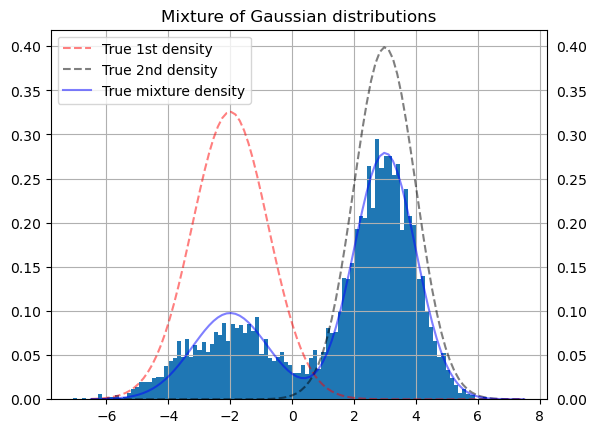

In [10]:
def Gaussian_pdf(x, mean, variance):
  z = np.exp(-(x - mean)**2/(2*variance))/np.sqrt(2*np.pi*variance)
  return z

count, bins, ignored = plt.hist(samples, 100, density=True)
x = np.linspace(np.min(mu) - 3*np.max(sigma),
                np.max(mu) + 3*np.max(sigma), 100)
plt.plot(x, Gaussian_pdf(x, mu[0], sigma[0]), linestyle = 'dashed', alpha = 0.5, color='red', label="True 1st density")
plt.plot(x, Gaussian_pdf(x, mu[1], sigma[1]), linestyle = 'dashed', alpha = 0.5, color='k', label="True 2nd density")
plt.plot(x, weights[0]*Gaussian_pdf(x, mu[0], sigma[0]) + (1-weights[0])*Gaussian_pdf(x, mu[1], sigma[1]), alpha = 0.5, color='b', label="True mixture density")

plt.title('Mixture of Gaussian distributions')
plt.tick_params(labelright=True)
plt.grid(True)
plt.legend();

#### <font color=darkorange>Estimation du modèle</font>

#### Question 6
- Estimez les paramètres du modèle en utilisant les échantillons précédents et le package `mixture` de `sklearn`. On pourra utiliser la classe `GaussianMixture` et la méthode `fit`.
- Fournissez les paramètres estimés (à l'aide des attributs `means_`, `weights_`, etc.).

In [11]:
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=2)
X_train = np.reshape(samples, (5000,1))
clf.fit(X_train)

GaussianMixture(n_components=2)

In [12]:
clf.means_

array([[ 2.95424839],
       [-2.06380468]])

In [13]:
clf.weights_

array([0.69370248, 0.30629752])

In [14]:
clf.covariances_

array([[[1.0252772 ]],

       [[2.24124942]]])